In [2]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp, scipy, gc
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from SVM import *

gc.enable()

In [3]:
phi = 0.3
sigma2 = 1
tau2 = 0.5
theta = (phi, sigma2, tau2)

T = 500
X, Y = simulate_data(theta, T)

In [ ]:
n_particles = 200
np.var(np.asarray([bootstrap_PF_track(n_particles, theta, Y[:100])[0] for i in range(200)]))

### MCMC for $\phi$:

In [3]:
def pMCMC_dac_phi(Y, theta_0, n_particles, n_mcmc, scale, M, power=1, adapt=True, start_adapt=0.2) :
    T = len(Y)
    assert T%M == 0
    K = int(T/M)
    phi_chains = np.zeros((M,n_mcmc+1))
    for m in range(M) :
        Y_chunk = Y[m*K:(m+1)*K]
        phi_chains[m] = pMCMC_phi(Y_chunk, theta_0, n_particles, n_mcmc, scale, power=M)[0]
    return phi_chains

In [ ]:
M = 5
n_particles = 2*int(T/M) 
n_mcmc = 10_000
sc = 0.2
phi_chains = pMCMC_dac_phi(Y, theta, n_particles, n_mcmc, sc, M)

100%|██████████| 10000/10000 [32:49<00:00,  5.15it/s]

28.07 % acceptance rate



100%|██████████| 10000/10000 [33:17<00:00,  4.65it/s]

28.14 % acceptance rate



100%|██████████| 10000/10000 [33:07<00:00,  5.04it/s]

29.03 % acceptance rate



 47%|████▋     | 4708/10000 [15:18<16:59,  5.19it/s]

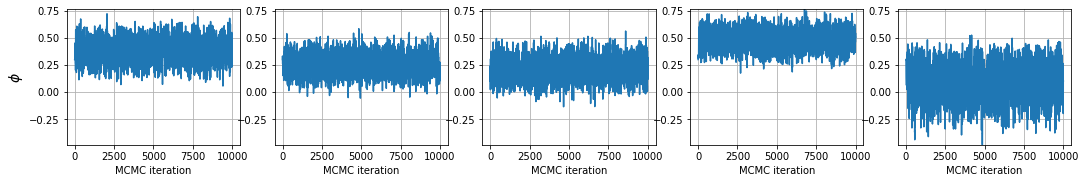

In [12]:
plt.rcParams['figure.figsize'] = (18, 2.5)
for m in range(M) :
    plt.subplot(1,M,m+1)
    if m == 0 :
        plt.ylabel(r"$\phi$", fontsize=14)
    plt.ylim(np.min(phi_chains),np.max(phi_chains))
    plt.plot(phi_chains[m])
    plt.grid(True)
    plt.xlabel("MCMC iteration")

In [ ]:
n_particles = 2*T
phi_chain_full = pMCMC_phi(Y, theta, n_particles, n_mcmc, sc/np.sqrt(M))[0]

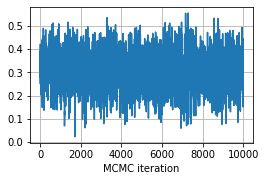

In [14]:
plt.rcParams['figure.figsize'] = (4, 2.5)
plt.plot(phi_chain_full)
plt.grid(True)
plt.xlabel("MCMC iteration");

In [15]:
print("95% credible interval for phi")
print("MCMC on full data:      ", np.percentile(phi_chain_full,q=[2.5,97.5]))
print("Divide-and-conquer MCMC:", np.mean(np.percentile(phi_chains,q=[2.5,97.5],axis=1),1))

95% credible interval for phi
MCMC on full data:       [0.1499404  0.46040263]
Divide-and-conquer MCMC: [0.072497   0.49373675]


### MCMC for $\sigma^2$:

In [ ]:
def pMCMC_dac_sigma2(Y, theta_0, n_particles, n_mcmc, scale, M, power=1, adapt=True, start_adapt=0.2) :
    T = len(Y)
    assert T%M == 0
    K = int(T/M)
    sigma2_chains = np.zeros((M,n_mcmc+1))
    for m in range(M) :
        Y_chunk = Y[m*K:(m+1)*K]
        sigma2_chains[m] = pMCMC_sigma2(Y_chunk, theta_0, n_particles, n_mcmc, scale, power=M)[0]
    return sigma2_chains

In [ ]:
M = 5
n_particles = 2*int(T/M) 
n_mcmc = 10_000
sc = 0.7
log_sigma2_chains = pMCMC_dac_sigma2(Y, theta, n_particles, n_mcmc, sc, M)

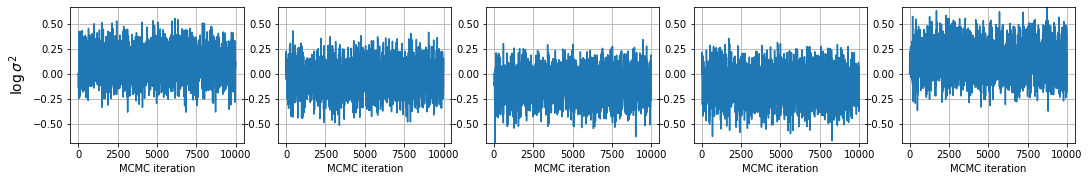

In [18]:
plt.rcParams['figure.figsize'] = (18, 2.5)
for m in range(M) :
    plt.subplot(1,M,m+1)
    if m == 0 :
        plt.ylabel(r"$\log \, \sigma^2$", fontsize=14)
    plt.ylim(np.min(log_sigma2_chains),np.max(log_sigma2_chains))
    plt.plot(log_sigma2_chains[m])
    plt.grid(True)
    plt.xlabel("MCMC iteration")

In [17]:
n_particles = 2*T
log_sigma2_chain_full = pMCMC_sigma2(Y, theta, n_particles, n_mcmc, sc/np.sqrt(M))[0]

100%|██████████| 10000/10000 [1:44:44<00:00,  1.36it/s]

31.28 % acceptance rate


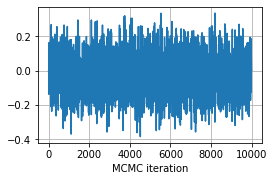

In [19]:
plt.rcParams['figure.figsize'] = (4, 2.5)
plt.plot(log_sigma2_chain_full)
plt.grid(True)
plt.xlabel("MCMC iteration");

In [20]:
print("95% credible interval for log sigma^2")
print("MCMC on full data:      ", np.percentile(log_sigma2_chain_full,q=[2.5,97.5]))
print("Divide-and-conquer MCMC:", np.mean(np.percentile(log_sigma2_chains,q=[2.5,97.5],axis=1),1))

95% credible interval for log sigma^2
MCMC on full data:       [-0.23621476  0.19741635]
Divide-and-conquer MCMC: [-0.2988512   0.28480676]


In [21]:
print("95% credible interval for sigma^2")
print("MCMC on full data:      ", np.percentile(np.exp(log_sigma2_chain_full),q=[2.5,97.5]))
print("Divide-and-conquer MCMC:", np.mean(np.percentile(np.exp(log_sigma2_chains),q=[2.5,97.5],axis=1),1))

95% credible interval for sigma^2
MCMC on full data:       [0.78961108 1.21825116]
Divide-and-conquer MCMC: [0.74582106 1.33799592]
